In [ ]:
# drive'a baglanma
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import os
from sklearn.utils import shuffle
import shutil
import numpy as np
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, AveragePooling2D
from keras.layers import BatchNormalization
from keras.optimizers import SGD
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from keras import layers
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, f1_score,classification_report
from keras.utils import to_categorical
import random

Veri Seti Boyutu

In [ ]:
#Train setindaki image'lerin path'lerini ve path'lerinden aldigimiz label'larini iki ayrı listeye atama
directory="/content/drive/MyDrive/derin_ogrenme_temelleri/data/"

j=0
for label in os.listdir(directory):
  k=0
  for i in os.listdir(directory + label):
    k+=1
    j+=1
  print(label,': ',str(k))

print('Toplam görsel sayısı: ',str(j))

meningioma :  1645
glioma :  1620
pituitary :  1757
notumor :  2000
Toplam görsel sayısı:  7022


## Veri Setini Train-Test Bölme

In [ ]:
"""os.makedirs(r"/content/drive/MyDrive/derin_ogrenme_temelleri/data2")
os.makedirs(r"/content/drive/MyDrive/derin_ogrenme_temelleri/data2/train")
os.makedirs(r"/content/drive/MyDrive/derin_ogrenme_temelleri/data2/test")

for label in os.listdir(directory):
  paths=[]
  os.makedirs(r"/content/drive/MyDrive/derin_ogrenme_temelleri/data2/test/"+ label)
  os.makedirs(r"/content/drive/MyDrive/derin_ogrenme_temelleri/data2/train/"+ label)

  for i in os.listdir(directory + label):
    paths.append(directory + label + "/" + i)
  paths = shuffle(paths, random_state=0)

  test_paths=paths[:round(len(paths)* 0.2)]
  for j in test_paths:
    shutil.copy(j,r"/content/drive/MyDrive/derin_ogrenme_temelleri/data2/test/"+ label)

  train_paths=paths[round(len(paths)* 0.2):]
  for j in train_paths:
    shutil.copy(j,r"/content/drive/MyDrive/derin_ogrenme_temelleri/data2/train/"+ label)"""

Train ve Test Veri Setlerinin Boyutu

In [ ]:
#Test
directory="/content/drive/MyDrive/derin_ogrenme_temelleri/data2/test/"

j=0
for label in os.listdir(directory):
  k=0
  for i in os.listdir(directory + label):
    k+=1
    j+=1
  print(label,': ',str(k))

print('Toplam görsel sayısı: ',str(j))

meningioma :  329
glioma :  324
pituitary :  351
notumor :  400
Toplam görsel sayısı:  1404


In [ ]:
#Train
directory="/content/drive/MyDrive/derin_ogrenme_temelleri/data2/train/"

j=0
for label in os.listdir(directory):
  k=0
  for i in os.listdir(directory + label):
    k+=1
    j+=1
  print(label,': ',str(k))

print('Toplam görsel sayısı: ',str(j))

meningioma :  1316
glioma :  1296
pituitary :  1406
notumor :  1600
Toplam görsel sayısı:  5618


In [ ]:
#Train setindaki image'lerin path'lerini ve path'lerinden aldigimiz label'larini iki ayrı listeye atama
test_directory="/content/drive/MyDrive/derin_ogrenme_temelleri/data2/test/"
train_directory="/content/drive/MyDrive/derin_ogrenme_temelleri/data2/train/"

train_paths=[]
train_labels=[]
labels_dict={"notumor":0, "glioma":1, "meningioma":2, "pituitary":3}
key_list = list(labels_dict.keys())
val_list = list(labels_dict.values())

for label in os.listdir(train_directory):
  for i in os.listdir(train_directory + label):
    train_paths.append(train_directory + label + "/" + i)
    train_labels.append(label)

train_paths, train_labels =shuffle(train_paths, train_labels, random_state=0)

In [ ]:
#Test setindaki image'lerin path'lerini ve path'lerinden aldigimiz label'larini iki ayrı listeye atama
test_paths=[]
test_labels=[]

for label in os.listdir(test_directory):
  for i in os.listdir(test_directory + label):
    test_paths.append(test_directory + label + "/" + i)
    test_labels.append(label)

test_paths, test_labels =shuffle(test_paths, test_labels, random_state=0)

In [ ]:
#train_path listesinde bulunan pathlerdeki resimleri matrise cevirme ve listeye atama
train_images=[]

for path in train_paths:
  image=cv2.imread(path,cv2.IMREAD_GRAYSCALE)/255
  image=cv2.resize(image, (200,200))
  train_images.append(image)

#train_labels listesindeki label'ları numerik olarak ifade etme
for i in range(0,len(train_labels)):
  train_labels[i]=labels_dict[train_labels[i]]

In [ ]:
#test_path listesinde bulunan pathlerdeki resimleri matrise cevirme ve listeye atama
test_images=[]

for path in test_paths:
  image=cv2.imread(path,cv2.IMREAD_GRAYSCALE)/255
  image=cv2.resize(image, (200,200))
  test_images.append(image)

#test_labels listesindeki label'ları numerik olarak ifade etme
for i in range(0,len(test_labels)):
  test_labels[i]=labels_dict[test_labels[i]]

In [ ]:
#Görüntülerin boyutları
images_shape=(np.array(test_images[0]).shape[1], np.array(test_images[0]).shape[1] , 1)
images_shape

(200, 200, 1)

Veri setinden örnek görüntüler ve etiketleri

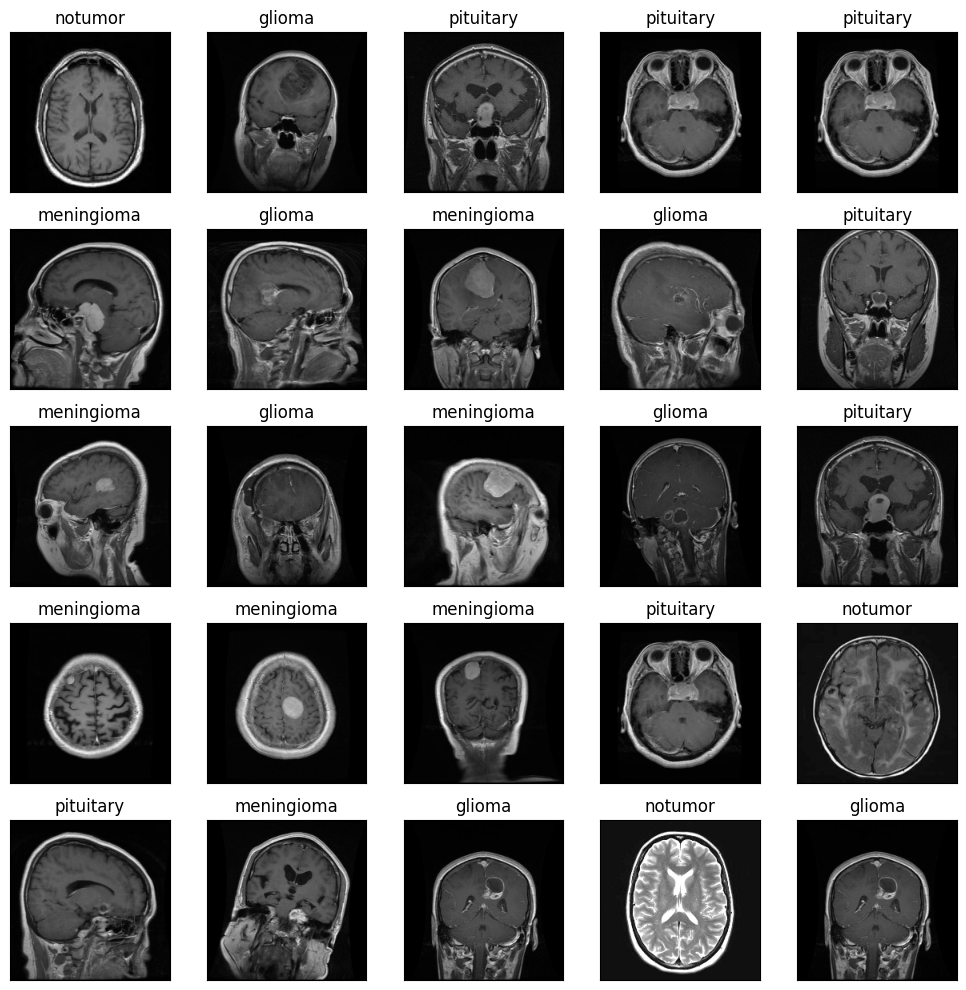

In [ ]:
fig, ax = plt.subplots(5,5, figsize=(10, 10), subplot_kw={'xticks': [], 'yticks': []})

for h in range(0,5):
  for w in range(0,5):
    index=random.randint(0,100)
    ax[h][w].imshow(train_images[index],cmap="gray")
    tumor = val_list.index(train_labels[index])
    ax[h][w].set_title(key_list[tumor])

plt.tight_layout()
plt.show()

## Model Oluşturma

In [ ]:
model = Sequential()

# Konvolüsyon Katmanı 1
model.add(Conv2D(32,(7,7), input_shape=(200, 200, 1), padding='same', activation='relu'))
model.add(BatchNormalization())
# Havuzlama Katmanı 1
model.add(MaxPooling2D(pool_size=(2,2)))

#Konvolüsyon Katmanı 2
model.add(Conv2D(64,(7,7), padding='same', activation='relu'))
model.add(BatchNormalization())
# Havuzlama Katmanı 2
model.add(MaxPooling2D(pool_size=(2,2)))

# Konvolüsyon Katmanı 3
model.add(Conv2D(128,(7,7), padding='same', activation='relu'))
model.add(BatchNormalization())
# Havuzlama Katmanı 3
model.add(MaxPooling2D(pool_size=(2,2)))

# Konvolüsyon Katmanı 4
model.add(Conv2D(256,(7,7), padding='same', activation='relu'))
model.add(BatchNormalization())
# Havuzlama Katmanı 4
model.add(AveragePooling2D(pool_size=(2,2)))

# Konvolüsyon Katmanı 5
model.add(Conv2D(512,(7,7), padding='same', activation='relu'))
model.add(BatchNormalization())
# Havuzlama Katmanı 5
model.add(MaxPooling2D(pool_size=(2,2)))

# Flatten katmanı
model.add(Flatten())

# Fully connected katmanı
model.add(Dense(units= 1024, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units= 512, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=4, activation='softmax'))

model.compile(optimizer=SGD(learning_rate=0.001), loss='categorical_crossentropy', metrics= ['categorical_accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 200, 200, 32)      1600      
                                                                 
 batch_normalization (Batch  (None, 200, 200, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 100, 100, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 100, 100, 64)      100416    
                                                                 
 batch_normalization_1 (Bat  (None, 100, 100, 64)      256       
 chNormalization)                                                
                                                        

## Eğitim

In [ ]:
train_labels2 = to_categorical(np.array(train_labels), num_classes=4)
test_labels2 = to_categorical(np.array(test_labels), num_classes=4)
train_labels2 = np.array(train_labels2)
test_labels2 = np.array(test_labels2)

train_images2 = np.array(train_images)
test_images2 = np.array(test_images)

### Model1

In [ ]:
validation_tuple=(train_images2[round(len(train_images)*0.7):], train_labels2[round(len(train_images)*0.7):])

In [ ]:
earlystopping = EarlyStopping(monitor = 'loss', min_delta = 1e-11, patience = 12, verbose = 1)
reducelronplateau = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.2, patience = 6, verbose = 1)
modelcheckpoint = ModelCheckpoint(filepath = '/content/drive/MyDrive/derin_ogrenme_temelleri/model_weights.h5', monitor = 'val_categorical_accuracy',
                      save_best_only = True, verbose = 1)

output = model.fit(x=train_images2[:round(len(train_images)*0.7)], y=train_labels2[:round(len(train_images)*0.7)], steps_per_epoch=3933//32, epochs=100, validation_data = validation_tuple, validation_steps= 1685//32,
                     callbacks=[earlystopping, reducelronplateau, modelcheckpoint])

Epoch 1/100
122/122 [==============================] - ETA: 0s - loss: 0.7747 - categorical_accuracy: 0.7114
Epoch 1: val_categorical_accuracy improved from -inf to 0.24392, saving model to /content/drive/MyDrive/derin_ogrenme_temelleri/model_weights.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


122/122 [==============================] - 43s 231ms/step - loss: 0.7747 - categorical_accuracy: 0.7114 - val_loss: 1.3973 - val_categorical_accuracy: 0.2439 - lr: 0.0010
Epoch 2/100
122/122 [==============================] - ETA: 0s - loss: 0.4055 - categorical_accuracy: 0.8395
Epoch 2: val_categorical_accuracy improved from 0.24392 to 0.24807, saving model to /content/drive/MyDrive/derin_ogrenme_temelleri/model_weights.h5
122/122 [==============================] - 31s 252ms/step - loss: 0.4055 - categorical_accuracy: 0.8395 - val_loss: 1.5117 - val_categorical_accuracy: 0.2481 - lr: 0.0010
Epoch 3/100
122/122 [==============================] - ETA: 0s - loss: 0.2793 - categorical_accuracy: 0.8915
Epoch 3: val_categorical_accuracy improved from 0.24807 to 0.38635, saving model to /content/drive/MyDrive/derin_ogrenme_temelleri/model_weights.h5
122/122 [==============================] - 30s 246ms/step - loss: 0.2793 - categorical_accuracy: 0.8915 - val_loss: 1.3863 - val_categorical_acc

### Model2

In [ ]:
model2 = Sequential()

# Konvolüsyon Katmanı 1
model2.add(Conv2D(32,(7,7), input_shape=(200, 200, 1), padding='same', activation='relu'))
model2.add(BatchNormalization())
# Havuzlama Katmanı 1
model2.add(MaxPooling2D(pool_size=(2,2)))

#Konvolüsyon Katmanı 2
model2.add(Conv2D(64,(7,7), padding='same', activation='relu'))
model2.add(BatchNormalization())
# Havuzlama Katmanı 2
model2.add(MaxPooling2D(pool_size=(2,2)))

# Konvolüsyon Katmanı 3
model2.add(Conv2D(128,(7,7), padding='same', activation='relu'))
model2.add(BatchNormalization())
# Havuzlama Katmanı 3
model2.add(AveragePooling2D(pool_size=(2,2)))

# Flatten katmanı
model2.add(Flatten())

# Fully connected katmanı
model2.add(Dense(units= 256, activation='relu'))
model2.add(Dropout(0.25))
model2.add(Dense(units= 128, activation='relu'))
model2.add(Dropout(0.25))
model2.add(Dense(units=4, activation='softmax'))


model2.compile(optimizer=SGD(learning_rate=0.001), loss='categorical_crossentropy', metrics= ['categorical_accuracy'])

In [ ]:
validation_tuple2=(train_images2[round(len(train_images)*0.8):], train_labels2[round(len(train_images)*0.8):])

In [ ]:
earlystopping2 = EarlyStopping(monitor = 'loss', min_delta = 0.0001, patience = 12, verbose = 1)
reducelronplateau2= ReduceLROnPlateau(monitor = 'val_loss', factor = 0.2, patience = 6, verbose = 1)
modelcheckpoint2 = ModelCheckpoint(filepath = '/content/drive/MyDrive/derin_ogrenme_temelleri/model_weights.h5', monitor = 'val_categorical_accuracy',
                      save_best_only = True, verbose = 1)

output2 = model2.fit(x=train_images2[:round(len(train_images)*0.8)], y=train_labels2[:round(len(train_images)*0.8)], steps_per_epoch=4494//32,
                     epochs=100, validation_data = validation_tuple2, validation_steps= 1124//32,
                     callbacks=[earlystopping2, reducelronplateau2, modelcheckpoint2])

Epoch 1/100
140/140 [==============================] - ETA: 0s - loss: 0.7328 - categorical_accuracy: 0.7096
Epoch 1: val_categorical_accuracy improved from -inf to 0.25712, saving model to /content/drive/MyDrive/derin_ogrenme_temelleri/model_weights.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


140/140 [==============================] - 32s 207ms/step - loss: 0.7328 - categorical_accuracy: 0.7096 - val_loss: 1.5008 - val_categorical_accuracy: 0.2571 - lr: 0.0010
Epoch 2/100
140/140 [==============================] - ETA: 0s - loss: 0.4456 - categorical_accuracy: 0.8230
Epoch 2: val_categorical_accuracy improved from 0.25712 to 0.38434, saving model to /content/drive/MyDrive/derin_ogrenme_temelleri/model_weights.h5
140/140 [==============================] - 30s 216ms/step - loss: 0.4456 - categorical_accuracy: 0.8230 - val_loss: 1.3144 - val_categorical_accuracy: 0.3843 - lr: 0.0010
Epoch 3/100
140/140 [==============================] - ETA: 0s - loss: 0.3563 - categorical_accuracy: 0.8602
Epoch 3: val_categorical_accuracy improved from 0.38434 to 0.68594, saving model to /content/drive/MyDrive/derin_ogrenme_temelleri/model_weights.h5
140/140 [==============================] - 26s 185ms/step - loss: 0.3563 - categorical_accuracy: 0.8602 - val_loss: 0.7543 - val_categorical_acc

In [ ]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 200, 200, 32)      1600      
                                                                 
 batch_normalization_8 (Bat  (None, 200, 200, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 100, 100, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 100, 100, 64)      100416    
                                                                 
 batch_normalization_9 (Bat  (None, 100, 100, 64)      256       
 chNormalization)                                                
                                                      

## Accuracy ve Loss Grafikleri

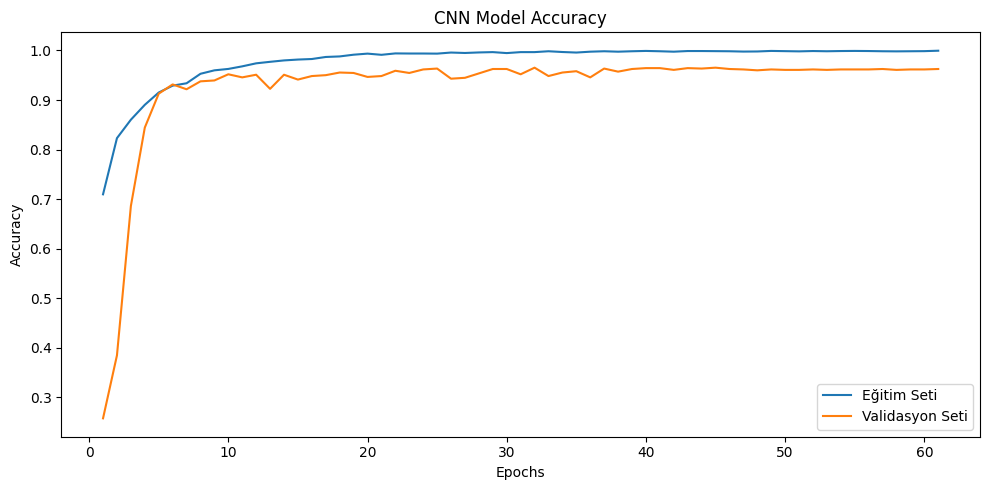

In [ ]:
accuracy = output2.history['categorical_accuracy']
val_accuracy = output2.history['val_categorical_accuracy']
loss = output2.history['loss']
val_loss = output2.history['val_loss']
epochs_list = range(1, len(output2.epoch) + 1)

plt.figure(figsize=(10,5))

plt.plot(epochs_list, accuracy, label='Eğitim Seti')
plt.plot(epochs_list, val_accuracy, label='Validasyon Seti')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('CNN Model Accuracy')

plt.tight_layout()
plt.show()

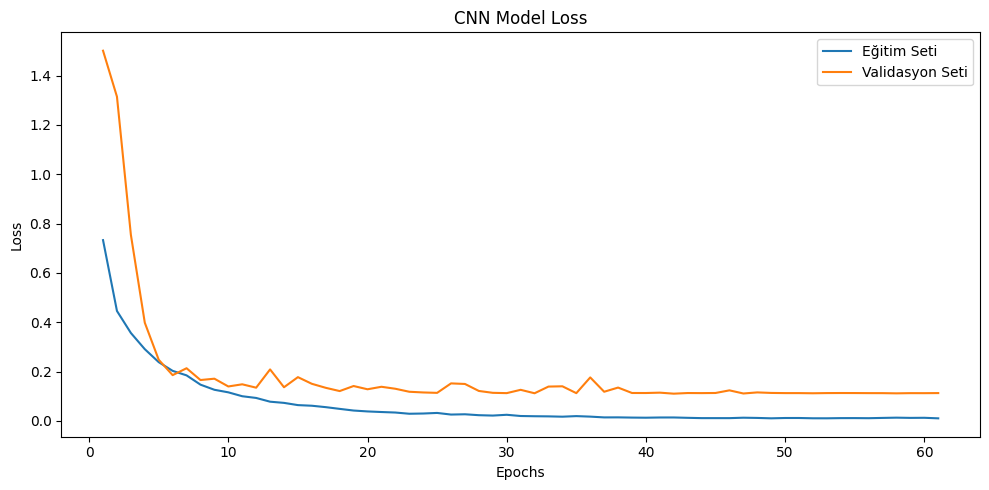

In [ ]:
plt.figure(figsize=(10,5))

plt.plot(epochs_list, loss, label='Eğitim Seti')
plt.plot(epochs_list, val_loss, label='Validasyon Seti')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('CNN Model Loss')

plt.tight_layout()
plt.show()

## Tahmin

1/1 [==============================] - 0s 63ms/step


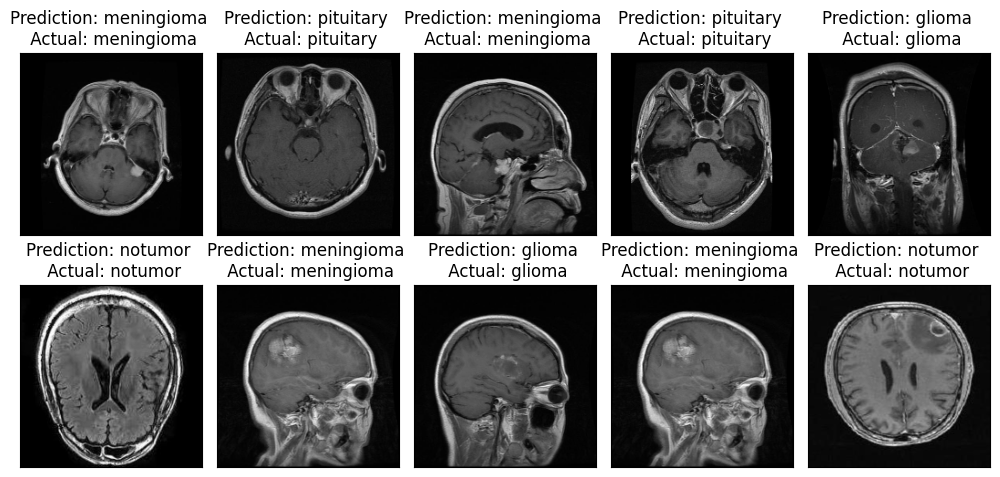

In [ ]:
#Bazı test verileri için modelin tahmin sonuçlarıyla label'ının karşılaştırılması ve çizilmesi
fig, ax = plt.subplots(2,5, figsize=(10, 5), subplot_kw={'xticks': [], 'yticks': []})
label_list=[]

for h in range(0,2):
  for w in range(0,5):
    index=random.randint(0,100)
    ax[h][w].imshow(test_images[index],cmap="gray")
    tumor = val_list.index(test_labels[index])
    label_list.append(key_list[tumor])
    pred2 = model2.predict(np.array([test_images[index]]))
    pred2 = np.argmax(pred2, axis=1)
    tumor2 = val_list.index(pred2)
    ax[h][w].set_title(f"Prediction: {key_list[tumor2]} \n Actual: {key_list[test_labels[index]]}")

plt.tight_layout()
plt.show()

## Model Değerlendirmesi

### Presicion, Recall ve F1 Score Hesabı

In [ ]:
pred = model2.predict(np.array(test_images))
pred = np.argmax(pred, axis=1)

print(classification_report(test_labels, pred))

44/44 [==============================] - 2s 27ms/step
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       400
           1       0.96      0.94      0.95       324
           2       0.93      0.91      0.92       329
           3       0.97      0.99      0.98       351

    accuracy                           0.96      1404
   macro avg       0.96      0.95      0.96      1404
weighted avg       0.96      0.96      0.96      1404



### Confusion Matrix

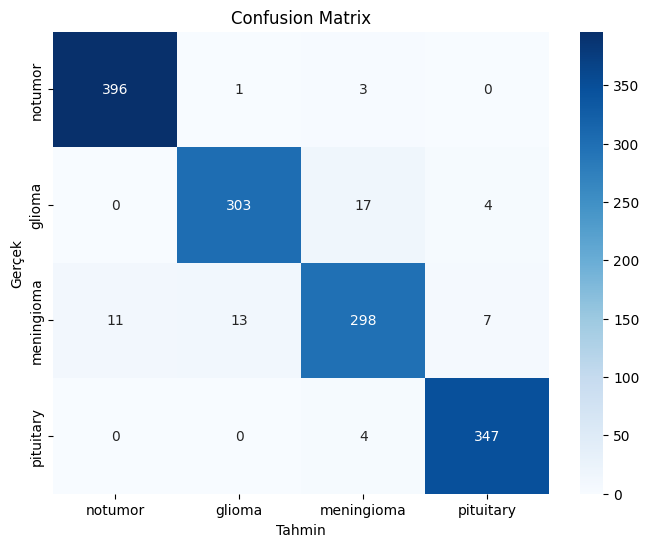

In [ ]:
conf_matrix = confusion_matrix(test_labels, pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=key_list, yticklabels=key_list)
plt.xlabel('Tahmin')
plt.ylabel('Gerçek')
plt.title('Confusion Matrix')
plt.show()